In [146]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [147]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [148]:
import pandas as pd

In [149]:
df_train = pd.read_excel("C:\\Users\\Sarah\\Desktop\\Thesis\\TestTrainSets\\Original_Dataset_No_Weather_TRAIN.xlsx")

df_test = pd.read_excel("C:\\Users\\Sarah\\Desktop\\Thesis\\TestTrainSets\\Original_Dataset_No_Weather_TEST.xlsx")

In [150]:
pip install scikit-learn

In [151]:
print(df_train)

       Event_Code  Type_Code  Deceased  isDeceased  Injured  Sick  Homeless  \
0           12200          1         0           0        0     0         0   
1           13213          1         0           0        0     0         0   
2           12200          1         0           0        0     0         0   
3           12200          1         0           0        0     0         0   
4           14110          1         0           0        0     0         0   
...           ...        ...       ...         ...      ...   ...       ...   
35558       14110          1         0           0        0     0         0   
35559       14110          1         0           0        0     0         0   
35560       14110          1         0           0        0     0         0   
35561       14110          1         0           0        0     0         0   
35562       14110          1         0           0        0     0         0   

       Displaced  MissingPeople  Total  ...  Income

In [152]:
df_train.isnull().sum()

Event_Code                 0
Type_Code                  0
Deceased                   0
isDeceased                 0
Injured                    0
Sick                       0
Homeless                   0
Displaced                  0
MissingPeople              0
Total                      0
Date                       0
Year                       0
YearMonth                  0
Month_Int                  0
Month_sin                  0
Month_cos                  0
isSpring                   0
isSummer                   0
isAutumn                   0
isWinter                   0
MunicipalityCode           0
StateCode                  0
MicroregionCode            0
MesoregionCode             0
Latitude                   0
Longitude                  0
x_Lat_Lon                  0
y_Lat_Lon                  0
z_Lat_Lon                  0
Population                 0
IDH_M_2000                 0
IDH_M_2010                 0
IDH_M_Income2000           0
IDH_M_Income2010           0
IDH_M_Longevit

In [153]:
y_train = df_train['Total'].values
y_test = df_test['Total'].values


X_train = df_train[['Event_Code', 'Longitude', 'MesoregionCode', 'MicroregionCode','MunicipalityCode', 'isSummer'



]].values

X_test = df_test[['Event_Code', 'Longitude', 'MesoregionCode', 'MicroregionCode','MunicipalityCode', 'isSummer'


]].values


In [154]:
import numpy as np

In [155]:
from sklearn.neighbors import KNeighborsRegressor

In [156]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
x_test = pd.DataFrame(x_test_scaled)

In [157]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [158]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1497.4984130488021
RMSE value for k=  2 is: 1103.8690140332956
RMSE value for k=  3 is: 979.1874108719836
RMSE value for k=  4 is: 941.4011411460394
RMSE value for k=  5 is: 916.8373006132215
RMSE value for k=  6 is: 898.4580029315682
RMSE value for k=  7 is: 884.596192512528
RMSE value for k=  8 is: 882.8733768563916
RMSE value for k=  9 is: 875.0463699957158
RMSE value for k=  10 is: 868.4638058046057
RMSE value for k=  11 is: 862.5540898138984
RMSE value for k=  12 is: 865.3977952526561
RMSE value for k=  13 is: 859.1652859543318
RMSE value for k=  14 is: 857.4934392459975
RMSE value for k=  15 is: 862.8548924845545
RMSE value for k=  16 is: 861.2879043827928
RMSE value for k=  17 is: 862.1799507389475
RMSE value for k=  18 is: 864.0682890720361
RMSE value for k=  19 is: 862.5313900990185
RMSE value for k=  20 is: 860.0097619910223


In [159]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [160]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9, 10, 11,12,13,14,15,16,17,18,19,20]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 20}

<AxesSubplot:>

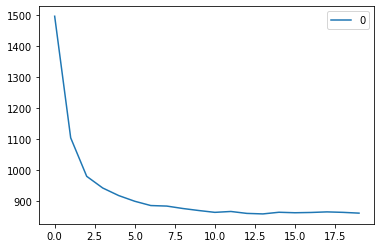

In [161]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

In [162]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9, 10, 11,12,13,14,15,16,17,18,19,20]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 20}

In [163]:
reg = KNeighborsRegressor(n_neighbors = 20)

In [164]:
#Fitting the model
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20)

In [165]:
from sklearn.metrics import mean_squared_error as mse

In [166]:
#Predicting over the test set
test_predict = reg.predict(X_test)
k = mse(test_predict, y_test)
print('Test MSE  ',k)

Test MSE   721621.6789920842


In [167]:
knn.fit(X_train,y_train)
test_score = knn.score(X_test,y_test)
train_score = knn.score(X_train,y_train)

In [168]:
print(test_score)

-0.20224661046391867


In [169]:
print(train_score)

pred=reg.predict(X_test)
print("Accuracy={}%".format((np.sum(y_test==pred)/y_test.shape[0])*100))

0.25007968626462873
Accuracy=38.03118676348054%


In [170]:
# Create an array
knn_r_acc = []

In [171]:
knn_r_acc.append((1, test_score ,train_score,"Accuracy={}%".format((np.sum(y_test==pred)/y_test.shape[0])*100)))

In [172]:
print(knn_r_acc)

[(1, -0.20224661046391867, 0.25007968626462873, 'Accuracy=38.03118676348054%')]


In [173]:
print(pred)

[ 68.85 141.95 141.95 ...   0.    43.     5.5 ]


In [174]:
#WAPE and RMSE

wape = np.sum(abs((np.array(y_test) - pred))) / np.array(y_test).sum()

print(wape)

mse = mean_squared_error(y_test, pred)
print("RMSE: %.2f" % (mse**(1/2.0)))





1.7358302262150356
RMSE: 849.48


In [175]:
# Python program for calculating Mean Absolute Error

# consider a list of integers for actual
actual = y_test

# consider a list of integers for actual
calculated =  pred

n = len(y_test)
sum = 0

# for loop for iteration
for i in range(n):
    sum += abs(actual[i] - calculated[i])

error = sum/n

# display
print("Mean absolute error : " + str(error))

#Now create Mean absolute error naive

sp = 1

y_pred_naive = y_test[:-sp]

# mean absolute error of naive seasonal prediction
mae_naive = np.mean(np.abs(y_test[sp:] - y_pred_naive))

print("MAE Naive : " + str(mae_naive))

MASE = str(error/mae_naive)

print("Mean Absolute Scaled Error : " + str(error/mae_naive))

NRMSE = (mse**(1/2.0))/np.mean(y_test)
print(NRMSE)

Mean absolute error : 196.50606475419687
MAE Naive : 190.06428571428572
Mean Absolute Scaled Error : 1.0338926327779159
7.503883345110528


In [31]:
#Now we will do the same code, but with a smaller portion of the dataset, to adjust for distances
#split the datasets into the distances and train/test

zeroto3k_train = pd.read_excel("C:\\Users\\Sarah\\Desktop\\Thesis\\TestTrainSets\\ORIGINAL_Oversampled_TrainSet_0-3km.xlsx")
zeroto35k_train = pd.read_excel("C:\\Users\\Sarah\\Desktop\\Thesis\\TestTrainSets\\ORIGINAL_Oversampled_TrainSet_0-35km.xlsx")
zeroto85k_train = pd.read_excel("C:\\Users\\Sarah\\Desktop\\Thesis\\TestTrainSets\\ORIGINAL_Oversampled_TrainSet_0-85km.xlsx")

zeroto3k_test = pd.read_excel("C:\\Users\\Sarah\\Desktop\\Thesis\\TestTrainSets\\ORIGINAL_TestSet_0-3km.xlsx")
zeroto35k_test = pd.read_excel("C:\\Users\\Sarah\\Desktop\\Thesis\\TestTrainSets\\ORIGINAL_TestSet_0-35km.xlsx")
zeroto85k_test = pd.read_excel("C:\\Users\\Sarah\\Desktop\\Thesis\\TestTrainSets\\ORIGINAL_TestSet_0-85km.xlsx")


In [32]:
#Set up y train and test for each
y_train_zeroto3k = zeroto3k_train['Total'].values
y_test_zeroto3k = zeroto3k_test['Total'].values

y_train_zeroto35k = zeroto35k_train['Total'].values
y_test_zeroto35k = zeroto35k_test['Total'].values

y_train_zeroto85k = zeroto85k_train['Total'].values
y_test_zeroto85k = zeroto85k_test['Total'].values

#set up x train and x test for each

zeroto3k_X_train = zeroto3k_train[['Event_Code', 'MesoregionCode', 'MunicipalityCode', 'isSummer'




]].values


zeroto3k_X_test = zeroto3k_test[['Event_Code', 'MesoregionCode', 'MunicipalityCode', 'isSummer'



]].values

zeroto35k_X_train = zeroto35k_train[['Event_Code', 'MesoregionCode', 'MunicipalityCode', 'isSummer'

]].values

zeroto35k_X_test = zeroto35k_test[['Event_Code', 'MesoregionCode', 'MunicipalityCode', 'isSummer'

]].values

zeroto85k_X_train = zeroto85k_train[['Event_Code', 'MesoregionCode', 'MunicipalityCode', 'isSummer'

]].values

zeroto85k_X_test = zeroto85k_test[['Event_Code', 'MesoregionCode', 'MunicipalityCode', 'isSummer'


]].values



In [33]:
from sklearn.neighbors import KNeighborsRegressor

#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_zeroto3k_scaled = scaler.fit_transform(zeroto3k_X_train)
x_train_zeroto3k = pd.DataFrame(x_train_zeroto3k_scaled)

x_test_zeroto3k_scaled = scaler.fit_transform(zeroto3k_X_test)
x_test_zeroto3k = pd.DataFrame(x_test_zeroto3k_scaled)


In [34]:
#test values for 0-3k

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train_zeroto3k, y_train_zeroto3k)  #fit the model
    pred=model.predict(x_test_zeroto3k) #make prediction on test set
    error = sqrt(mean_squared_error(y_test_zeroto3k,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    
   

RMSE value for k=  1 is: 1406.7984335107076
RMSE value for k=  2 is: 1293.865287752261
RMSE value for k=  3 is: 1166.9013919230702
RMSE value for k=  4 is: 1206.6694608723353
RMSE value for k=  5 is: 1154.4305232360525
RMSE value for k=  6 is: 1064.4239445941505
RMSE value for k=  7 is: 1068.5633153172973
RMSE value for k=  8 is: 1096.752293717757
RMSE value for k=  9 is: 1084.8944078596978
RMSE value for k=  10 is: 1085.7210907021615
RMSE value for k=  11 is: 1080.566168238387
RMSE value for k=  12 is: 1074.2003169014133
RMSE value for k=  13 is: 1070.890447177322
RMSE value for k=  14 is: 1067.4082824821003
RMSE value for k=  15 is: 1076.00408052818
RMSE value for k=  16 is: 1085.7949662915064
RMSE value for k=  17 is: 1093.2243612452994
RMSE value for k=  18 is: 1095.9023595604788
RMSE value for k=  19 is: 1099.625172759323
RMSE value for k=  20 is: 1103.8795255590487


<AxesSubplot:>

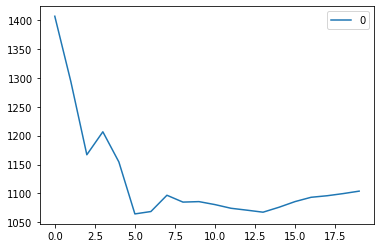

In [35]:
#Graph the k values
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

In [36]:

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9, 10, 11,12,13,14,15,16,17,18,19,20]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train_zeroto3k, y_train_zeroto3k)
model.best_params_

{'n_neighbors': 8}

In [37]:

#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt



In [38]:
x_test = x_test_zeroto3k 
x_train = x_train_zeroto3k
y_test = y_test_zeroto3k
y_train = y_train_zeroto3k

In [39]:
reg = KNeighborsRegressor(n_neighbors = 8)

#Fitting the model
reg.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error as mse


In [40]:
#Predicting over the test set
test_predict = reg.predict(x_test)
k = mse(test_predict, y_test)
print('Test MSE  ',k)
knn = neighbors.KNeighborsRegressor()
knn.fit(x_train,y_train)
test_score = knn.score(x_test,y_test)
train_score = knn.score(x_train,y_train)

print(test_score)

print(train_score)

pred=reg.predict(x_test)
print("Accuracy={}%".format((np.sum(y_test==pred)/y_test.shape[0])*100))



Test MSE   1202865.593775161
-0.10668952769092166
0.43028542852341123
Accuracy=30.112721417069245%


In [41]:
#WAPE and RMSE

wape = np.sum(abs((np.array(y_test) - pred))) / np.array(y_test).sum()

print(wape)

mse = mean_squared_error(y_test, pred)
print("RMSE: %.2f" % (mse**(1/2.0)))



2.382712776855779
RMSE: 1096.75


In [42]:
# Python program for calculating Mean Absolute Error

# consider a list of integers for actual
actual = y_test

# consider a list of integers for actual
calculated =  pred

n = len(y_test)
sum = 0

# for loop for iteration
for i in range(n):
    sum += abs(actual[i] - calculated[i])

error = sum/n

# display
print("Mean absolute error : " + str(error))

#Now create Mean absolute error naive

sp = 1

y_pred_naive = y_test[:-sp]

# mean absolute error of naive seasonal prediction
mae_naive = np.mean(np.abs(y_test[sp:] - y_pred_naive))

print("MAE Naive : " + str(mae_naive))

MASE = str(error/mae_naive)

print("Mean Absolute Scaled Error : " + str(error/mae_naive))

NRMSE = (mse**(1/2.0))/np.mean(y_test)
print(NRMSE)

Mean absolute error : 374.5348228663446
MAE Naive : 247.8709677419355
Mean Absolute Scaled Error : 1.5110072239532382
6.977310369401184


In [43]:
#Repeat for 0-35
from sklearn.neighbors import KNeighborsRegressor

#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_zeroto35k_scaled = scaler.fit_transform(zeroto35k_X_train)
x_train_zeroto35k = pd.DataFrame(x_train_zeroto35k_scaled)

x_test_zeroto35k_scaled = scaler.fit_transform(zeroto35k_X_test)
x_test_zeroto35k = pd.DataFrame(x_test_zeroto35k_scaled)



In [44]:
#test values for 0-35k

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train_zeroto35k, y_train_zeroto35k)  #fit the model
    pred=model.predict(x_test_zeroto35k) #make prediction on test set
    error = sqrt(mean_squared_error(y_test_zeroto35k,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    
   

RMSE value for k=  1 is: 2012.350933465196
RMSE value for k=  2 is: 1558.1635796202536
RMSE value for k=  3 is: 1412.5479886915332
RMSE value for k=  4 is: 1345.7051824367516
RMSE value for k=  5 is: 1462.9867377508003
RMSE value for k=  6 is: 1458.7216093515574
RMSE value for k=  7 is: 1375.0291848698832
RMSE value for k=  8 is: 1410.160544362556
RMSE value for k=  9 is: 1348.1720030279344
RMSE value for k=  10 is: 1322.0018851853697
RMSE value for k=  11 is: 1325.7012896901408
RMSE value for k=  12 is: 1283.4236490807257
RMSE value for k=  13 is: 1254.7050293935429
RMSE value for k=  14 is: 1244.3762433203624
RMSE value for k=  15 is: 1228.2167914919166
RMSE value for k=  16 is: 1214.6619072519056
RMSE value for k=  17 is: 1200.9845478814586
RMSE value for k=  18 is: 1191.1146075284414
RMSE value for k=  19 is: 1182.132658142565
RMSE value for k=  20 is: 1173.8162670000681


{'n_neighbors': 19}

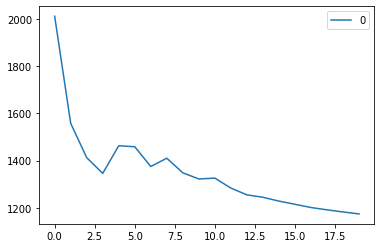

In [45]:
#Graph the k values
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()


from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9, 10, 11,12,13,14,15,16,17,18,19,20]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train_zeroto35k, y_train_zeroto35k)
model.best_params_

In [46]:

#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

x_test = x_test_zeroto35k 
x_train = x_train_zeroto35k
y_test = y_test_zeroto35k
y_train = y_train_zeroto35k

reg = KNeighborsRegressor(n_neighbors = 19)

#Fitting the model
reg.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error as mse

#Predicting over the test set
test_predict = reg.predict(x_test)
k = mse(test_predict, y_test)
print('Test MSE  ',k)
knn = neighbors.KNeighborsRegressor()
knn.fit(x_train,y_train)
test_score = knn.score(x_test,y_test)
train_score = knn.score(x_train,y_train)

print(test_score)

print(train_score)

pred=reg.predict(x_test)
print("Accuracy={}%".format((np.sum(y_test==pred)/y_test.shape[0])*100))



Test MSE   1397437.6214472067
-1.5960886481420316
0.5559042556294144
Accuracy=28.580872631115028%


In [47]:
#WAPE and RMSE

wape = np.sum(abs((np.array(y_test) - pred))) / np.array(y_test).sum()

print(wape)

mse = mean_squared_error(y_test, pred)
print("RMSE: %.2f" % (mse**(1/2.0)))


3.047236745456214
RMSE: 1182.13


In [48]:
# Python program for calculating Mean Absolute Error

# consider a list of integers for actual
actual = y_test

# consider a list of integers for actual
calculated =  pred

n = len(y_test)
sum = 0

# for loop for iteration
for i in range(n):
    sum += abs(actual[i] - calculated[i])

error = sum/n

# display
print("Mean absolute error : " + str(error))

#Now create Mean absolute error naive

sp = 1

y_pred_naive = y_test[:-sp]

# mean absolute error of naive seasonal prediction
mae_naive = np.mean(np.abs(y_test[sp:] - y_pred_naive))

print("MAE Naive : " + str(mae_naive))

MASE = str(error/mae_naive)

print("Mean Absolute Scaled Error : " + str(error/mae_naive))

NRMSE = (mse**(1/2.0))/np.mean(y_test)
print(NRMSE)

Mean absolute error : 379.3836607826289
MAE Naive : 213.79016971567114
Mean Absolute Scaled Error : 1.774560828906155
9.494974207547033


In [49]:
#Repeat for 0-85
from sklearn.neighbors import KNeighborsRegressor

#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_zeroto85k_scaled = scaler.fit_transform(zeroto85k_X_train)
x_train_zeroto85k = pd.DataFrame(x_train_zeroto85k_scaled)

x_test_zeroto85k_scaled = scaler.fit_transform(zeroto85k_X_test)
x_test_zeroto85k = pd.DataFrame(x_test_zeroto85k_scaled)




In [50]:
#test values for 0-85k

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train_zeroto85k, y_train_zeroto85k)  #fit the model
    pred=model.predict(x_test_zeroto85k) #make prediction on test set
    error = sqrt(mean_squared_error(y_test_zeroto85k,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1823.4607187488714
RMSE value for k=  2 is: 1482.5969473938662
RMSE value for k=  3 is: 1324.7581543252902
RMSE value for k=  4 is: 1272.082789787321
RMSE value for k=  5 is: 1308.099167764874
RMSE value for k=  6 is: 1252.2482159062663
RMSE value for k=  7 is: 1203.7246044402643
RMSE value for k=  8 is: 1239.696455503958
RMSE value for k=  9 is: 1205.4323484492052
RMSE value for k=  10 is: 1196.7312191560718
RMSE value for k=  11 is: 1198.5107256453787
RMSE value for k=  12 is: 1187.644126661061
RMSE value for k=  13 is: 1163.734620106319
RMSE value for k=  14 is: 1150.000085634011
RMSE value for k=  15 is: 1141.7368297699466
RMSE value for k=  16 is: 1146.1429864098545
RMSE value for k=  17 is: 1138.778256412183
RMSE value for k=  18 is: 1132.0255878396454
RMSE value for k=  19 is: 1126.340072548746
RMSE value for k=  20 is: 1117.5283479185666


{'n_neighbors': 20}

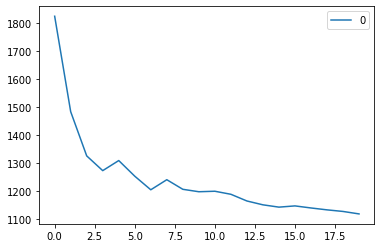

In [51]:
#Graph the k values
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()


from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9, 10, 11,12,13,14,15,16,17,18,19,20]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train_zeroto85k, y_train_zeroto85k)
model.best_params_

In [52]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt



In [53]:

#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

x_test = x_test_zeroto85k 
x_train = x_train_zeroto85k
y_test = y_test_zeroto85k
y_train = y_train_zeroto85k

reg = KNeighborsRegressor(n_neighbors = 20)

#Fitting the model
reg.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error as mse

#Predicting over the test set
test_predict = reg.predict(x_test)
k = mse(test_predict, y_test)
print('Test MSE  ',k)
knn = neighbors.KNeighborsRegressor()
knn.fit(x_train,y_train)
test_score = knn.score(x_test,y_test)
train_score = knn.score(x_train,y_train)

print(test_score)

print(train_score)

pred=reg.predict(x_test)
print("Accuracy={}%".format((np.sum(y_test==pred)/y_test.shape[0])*100))



Test MSE   1248869.6084016007
-1.4428999601456618
0.5341780312927777
Accuracy=33.76883239171375%


In [54]:
#WAPE and RMSE

wape = np.sum(abs((np.array(y_test) - pred))) / np.array(y_test).sum()

print(wape)

mse = mean_squared_error(y_test, pred)
print("RMSE: %.2f" % (mse**(1/2.0)))


3.0144628450481226
RMSE: 1117.53


In [55]:
# Python program for calculating Mean Absolute Error

# consider a list of integers for actual
actual = y_test

# consider a list of integers for actual
calculated =  pred

n = len(y_test)
sum = 0

# for loop for iteration
for i in range(n):
    sum += abs(actual[i] - calculated[i])

error = sum/n

# display
print("Mean absolute error : " + str(error))

#Now create Mean absolute error naive

sp = 1

y_pred_naive = y_test[:-sp]

# mean absolute error of naive seasonal prediction
mae_naive = np.mean(np.abs(y_test[sp:] - y_pred_naive))

print("MAE Naive : " + str(mae_naive))

MASE = str(error/mae_naive)

print("Mean Absolute Scaled Error : " + str(error/mae_naive))

NRMSE = (mse**(1/2.0))/np.mean(y_test)
print(NRMSE)

Mean absolute error : 321.35358992466877
MAE Naive : 179.95503237198352
Mean Absolute Scaled Error : 1.7857438366069225
10.482993776040312
